# Analytics Olympiad 2022

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 

In [4]:
train_df = pd.read_csv('train_hackathon.csv')
test_df = pd.read_csv('test.csv')


In [5]:
train_df.info()
# print('\nColumns with missing value:') 
# print(train_df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  int64  
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  int64  
 10  CHILDREN             105000 non-null  int64  
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  int64  
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [7]:
# Duplicate values
train_df[train_df.ID.duplicated()]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
498,101,65+,male,0-9y,university,upper class,0.548347,1,after 2015,0,1,31223,9000,0,0,1,1,Sedan
763,101,16-25,female,0-9y,university,upper class,0.767802,1,before 2015,1,1,10238,16000,0,0,1,0,SUV
873,65407,65+,male,30y+,none,working class,0.457980,1,before 2015,0,1,10238,14000,2,0,0,1,Sports Car
1134,101,40-64,male,20-29y,high school,working class,0.486620,1,before 2015,1,1,10238,9000,0,0,1,0,Sedan
1947,921,40-64,female,10-19y,university,working class,0.501622,1,after 2015,0,0,37221,10000,16,0,0,1,HatchBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104951,428541,65+,male,10-19y,high school,upper class,0.755837,0,after 2015,0,0,37564,10000,0,0,0,0,Sports Car
104952,26426,26-39,male,20-29y,high school,poverty,0.486131,1,after 2015,0,0,10238,14000,0,0,1,0,Sedan
104984,1956,16-25,male,0-9y,high school,working class,0.468282,1,after 2015,1,0,10238,4000,1,3,0,1,Sports Car
104991,274554,40-64,male,10-19y,high school,upper class,0.800758,1,before 2015,1,1,10238,12000,0,0,0,0,Sedan


In [8]:
train_df['AGE'].value_counts()

40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: AGE, dtype: int64

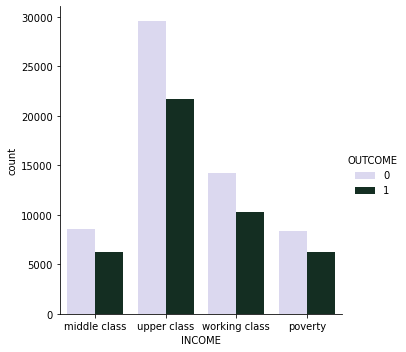

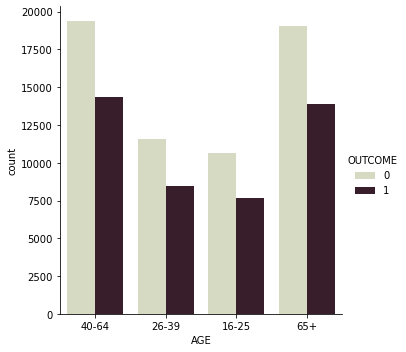

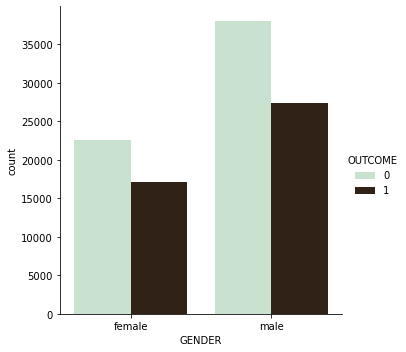

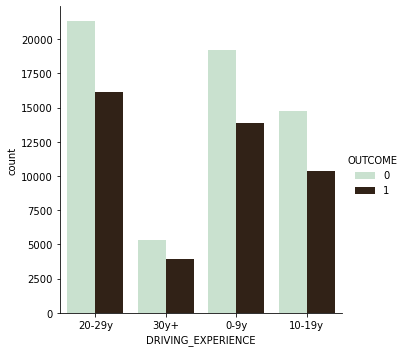

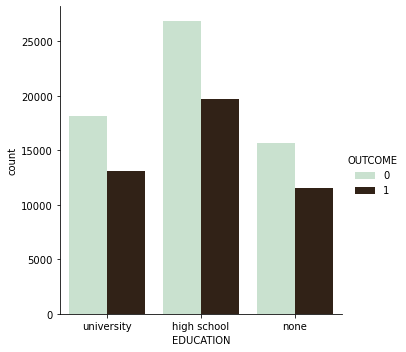

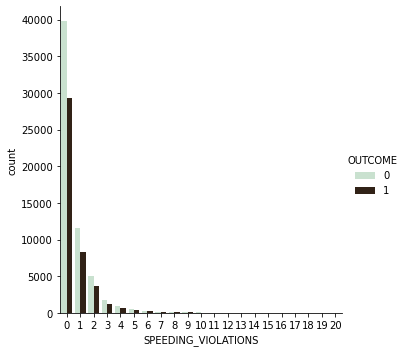

In [9]:
sns.catplot(data=train_df, x="INCOME", kind="count", hue = "OUTCOME", palette="ch:2")

sns.catplot(data=train_df, x="AGE", kind="count", hue = "OUTCOME", palette="ch:.50")

sns.catplot(data=train_df, x="GENDER", kind="count", hue = "OUTCOME", palette="ch:70")

sns.catplot(data=train_df, x="DRIVING_EXPERIENCE", kind="count", hue = "OUTCOME", palette="ch:70")

sns.catplot(data=train_df, x="EDUCATION", kind="count", hue = "OUTCOME", palette="ch:70")

sns.catplot(data=train_df, x="SPEEDING_VIOLATIONS", kind="count", hue = "OUTCOME", palette="ch:70")


In [10]:
train_df['AGE'] = preprocessing.LabelEncoder().fit_transform(train_df["AGE"])
train_df['GENDER'] = preprocessing.LabelEncoder().fit_transform(train_df["GENDER"])
train_df['DRIVING_EXPERIENCE'] = preprocessing.LabelEncoder().fit_transform(train_df["DRIVING_EXPERIENCE"])
train_df['EDUCATION'] = preprocessing.LabelEncoder().fit_transform(train_df["EDUCATION"])
train_df['INCOME'] = preprocessing.LabelEncoder().fit_transform(train_df["INCOME"])
train_df['VEHICLE_YEAR'] = preprocessing.LabelEncoder().fit_transform(train_df["VEHICLE_YEAR"])
train_df['TYPE_OF_VEHICLE'] = preprocessing.LabelEncoder().fit_transform(train_df["TYPE_OF_VEHICLE"])


In [11]:
test_df['AGE'] = preprocessing.LabelEncoder().fit_transform(test_df["AGE"])
test_df['GENDER'] = preprocessing.LabelEncoder().fit_transform(test_df["GENDER"])
test_df['DRIVING_EXPERIENCE'] = preprocessing.LabelEncoder().fit_transform(test_df["DRIVING_EXPERIENCE"])
test_df['EDUCATION'] = preprocessing.LabelEncoder().fit_transform(test_df["EDUCATION"])
test_df['INCOME'] = preprocessing.LabelEncoder().fit_transform(test_df["INCOME"])
test_df['VEHICLE_YEAR'] = preprocessing.LabelEncoder().fit_transform(test_df["VEHICLE_YEAR"])
test_df['TYPE_OF_VEHICLE'] = preprocessing.LabelEncoder().fit_transform(test_df["TYPE_OF_VEHICLE"])

In [12]:
test_df['ANNUAL_MILEAGE'] = preprocessing.LabelEncoder().fit_transform(test_df["ANNUAL_MILEAGE"])
test_df['CREDIT_SCORE'] = preprocessing.LabelEncoder().fit_transform(test_df["CREDIT_SCORE"])

train_df['ANNUAL_MILEAGE'] = preprocessing.LabelEncoder().fit_transform(train_df["ANNUAL_MILEAGE"])
train_df['CREDIT_SCORE'] = preprocessing.LabelEncoder().fit_transform(train_df["CREDIT_SCORE"])


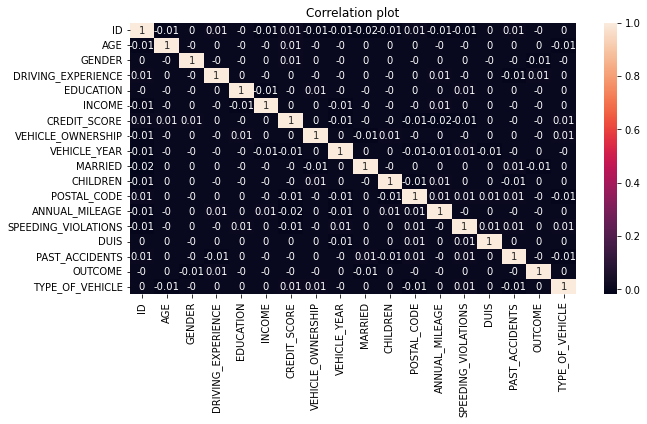

In [13]:
#correlation between features
plt.figure(figsize=(10,5) )
corr_plot = sns.heatmap(round(train_df.corr(),2),annot=True)
plt.title("Correlation plot")
plt.show()

##NO CORRELATION

In [14]:

# Using DataFrame.filter() method.
df_train = train_df.filter(['AGE','GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','CREDIT_SCORE','VEHICLE_OWNERSHIP',
'VEHICLE_YEAR','MARRIED','CHILDREN','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','TYPE_OF_VEHICLE'], axis=1)
# print(df2)
df_test = train_df.filter(['OUTCOME'],axis=1)


# Using DataFrame.filter() method.
test_df = test_df.filter(['AGE','GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','CREDIT_SCORE','VEHICLE_OWNERSHIP',
'VEHICLE_YEAR','MARRIED','CHILDREN','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','TYPE_OF_VEHICLE'], axis=1)
# print(df2)

In [15]:
# fit scaler on training data
norm = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size = 0.25, random_state = 0)
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# transform training data
X_train = norm.fit_transform(X_train)

# transform testing dataabs
X_test = norm.fit_transform(X_test)

test_df = norm.fit_transform(test_df)


In [16]:

# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
# gradient_booster = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, random_state=0)
# gradient_booster.get_params()

# for learning_rate in lr_list:
#     gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
#     gb_clf.fit(X_train, y_train)

# # gradient_booster.fit(X_train,y_train)
# # print(gradient_booster.score(X_val,y_val))
# print("Learning rate: ", learning_rate)
# print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
# print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))


# print("Confusion Matrix:")
# print(confusion_matrix(y_test, gb_clf.predict(X_test)))

# print("Classification Report")
# print(classification_report(y_test, gb_clf.predict(X_test)))

# print("Log Loss", metrics.log_loss(y_test, gb_clf.predict(X_test), eps=1e-15, normalize=True, sample_weight=None, labels=None))

## Logistic Regression

In [17]:

# logr = linear_model.LogisticRegression()

# logr.fit(X_train,y_train)

# logr_pred = logr.predict(X_test)

# print("Log Loss", metrics.log_loss(y_test, logr_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None))
# print("Confusion Matrix", confusion_matrix(y_test, logr_pred))

## SGD

In [18]:

# sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, early_stopping=True)
# sgd.fit(X_train, y_train) 
# sgd_pred= sgd.predict(X_test)

# sgdcm= confusion_matrix(y_test, sgd_pred)  
# print("Log Loss:", metrics.log_loss(y_test, sgd_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None))
# print("Confusion Matrix", sgdcm)

## Random Forest

In [19]:
#Fitting Decision Tree classifier to the training set  
 
# rnd= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
# # rnd = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
# #                        criterion='gini', max_depth=None, max_features='auto',
# #                        max_leaf_nodes=None, max_samples=None,
# #                        min_impurity_decrease=0.0,
# #                        min_samples_leaf=1, min_samples_split=2,
# #                        min_weight_fraction_leaf=0.0, n_estimators=10,
# #                        n_jobs=None, oob_score=False, random_state=None,
# #                        verbose=0, warm_start=False) 
# rnd.fit(X_train, y_train)  
# rnd_pred= rnd.predict(X_test)

# rndcm= confusion_matrix(y_test, rnd_pred)  
# print("Log Loss:", metrics.log_loss(y_test, rnd_pred))
# print("Confusion Matrix", rndcm)

## KNearest Neighbours

In [20]:
# training a KNN model
from turtle import distance
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, weights="distance", algorithm="kd_tree", metric='minkowski', p=1)
# fit
knn.fit(X_train, y_train)  
# predict
knn_pred = knn.predict(X_test)
print(knn_pred)
#Knn prediction 1.64242

[[0.42205059]
 [0.16663797]
 [0.11482482]
 ...
 [0.32267059]
 [0.28584955]
 [0.62892174]]


In [21]:
predict = list()
for i in (knn_pred):
    print(i)
    if i<0.6:
        predict.append(0)
    else:
        predict.append(1)

[0.42205059]
[0.16663797]
[0.11482482]
[0.]
[0.35283124]
[0.29649783]
[0.40969846]
[0.86502358]
[0.74401805]
[0.59437654]
[0.41895627]
[0.67203251]
[0.06615993]
[0.37265331]
[0.41186918]
[0.82216616]
[0.52361696]
[0.51721261]
[0.36467934]
[0.3979005]
[0.23645941]
[0.64606967]
[0.42508747]
[0.20648299]
[0.23445624]
[0.22414697]
[0.39619528]
[0.50028644]
[0.09575239]
[0.61748468]
[0.73453794]
[0.14781691]
[0.73364262]
[0.10100135]
[0.16306733]
[0.11612112]
[0.68603851]
[0.42126061]
[0.50767123]
[0.7586354]
[0.57020678]
[0.]
[0.7549556]
[0.26706677]
[0.16667384]
[0.27176577]
[0.11468818]
[0.49988149]
[0.66376375]
[0.59527574]
[0.62208351]
[0.76848501]
[0.31735196]
[0.28080779]
[0.35459281]
[0.41244819]
[0.]
[0.37539733]
[0.31301645]
[0.32972242]
[0.66207087]
[0.39566483]
[0.4313932]
[0.44885204]
[0.45820273]
[0.67924065]
[0.26664601]
[0.22011835]
[0.29366685]
[0.11457431]
[0.47169686]
[0.34175536]
[0.24399015]
[0.46221647]
[0.4052092]
[0.65373262]
[0.72989482]
[0.30117642]
[0.7425104]
[0.

In [22]:
knncm= confusion_matrix(y_test, predict)  
print("Log Loss:", metrics.log_loss(y_test, predict))
print("Confusion Matrix", knncm)
print('accuracy: ', knn.score(X_test, y_test))

Log Loss: 15.677404143552254
Confusion Matrix [[12121  2924]
 [ 8991  2214]]
accuracy:  -0.17296457223853579


In [23]:
# from sklearn import model_selection

# from sklearn.model_selection import cross_val_score
# # df_train = norm.fit_transform(df_train)
# scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

## XGBoost

In [ ]:
# pip install xgboost

In [24]:
from xgboost import XGBClassifier
# xgb_clf = XGBClassifier()
# xgb_clf.fit(X_train, y_train)
# score = xgb_clf.score(X_test, y_test)
# print(score)

In [25]:
# xgb_pred = xgb_clf.predict(X_test)
# print("Log Loss:", metrics.log_loss(y_test, xgb_pred))
# xgbcm= confusion_matrix(y_test, xgb_pred)  
# print("Confusion Matrix", xgbcm)

## Naive Bayes

In [26]:
from sklearn.naive_bayes import *
gnb = GaussianNB()
# gnb_clf = gnb.fit(X_train, y_train)
# gnb_pred = gnb_clf.predict(X_test)
# print("Log Loss:", metrics.log_loss(y_test, gnb_pred))
# gnbcm= confusion_matrix(y_test, gnb_pred)  
# print("Confusion Matrix", gnbcm)

mnb = MultinomialNB()
# mnb_clf = mnb.fit(X_train, y_train)
# mnb_pred = mnb_clf.predict(X_test)
# print("Log Loss:", metrics.log_loss(y_test, mnb_pred))
# mnbcm= confusion_matrix(y_test, mnb_pred)  
# print("Confusion Matrix", mnbcm)

cnb = CategoricalNB()
# cnb_clf = cnb.fit(X_train, y_train)
# cnb_pred = cnb_clf.predict(X_test)
# print("Log Loss:", metrics.log_loss(y_test, cnb_pred))
# cnbcm= confusion_matrix(y_test, cnb_pred)  
# print("Confusion Matrix", cnbcm)

## LightGBM

In [ ]:
# pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
# import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold
# # lgbc = lgb.LGBMClassifier(boosting_type='dart',class_weight='balanced',drop_rate=0.9, min_data_in_leaf=100, max_bin=255,
# #                                  n_estimators=1000,min_sum_hessian_in_leaf=1,importance_type='gain',learning_rate=0.1,bagging_fraction = 0.85,
# #                                  colsample_bytree = 1.0,feature_fraction = 0.1,lambda_l1 = 5.0,lambda_l2 = 3.0,max_depth =  9,objective='binary',
# #                                  min_child_samples = 55,min_child_weight = 5.0,min_split_gain = 0.1,num_leaves = 450,subsample = 0.75)

# lgbc = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves = 500, n_estimators=10000, objective='binary', class_weight='balanced',
# importance_type='gain',learning_rate=0.005)
# lgb_clf = lgbc.fit(X_train, y_train)
# lgb_pred = lgb_clf.predict(X_test)
# print("Log Loss:", metrics.log_loss(y_test, lgb_pred))
# lgbcm= confusion_matrix(y_test, lgb_pred)  
# print("Confusion Matrix", lgbcm) 
# print('accuracy: ', lgb_clf.score(X_test, y_test)) 

## Predicting on Test Dataframe

In [28]:
df = knn.predict(test_df)

In [ ]:
# df 

array([[0.        ],
       [0.31941884],
       [0.27999529],
       ...,
       [0.52254088],
       [0.25592355],
       [0.3754226 ]])

In [29]:
df_predict = list()
for i in (df):
    print(i)
    if i<=0.6:
        df_predict.append(0)
    else:
        df_predict.append(1)

[0.]
[0.31941884]
[0.27999529]
[0.56940987]
[0.13786987]
[0.32854317]
[0.1223738]
[0.73485634]
[0.24011439]
[0.51352362]
[0.12496385]
[0.64623629]
[0.31320957]
[0.85524566]
[0.51009504]
[0.03176231]
[0.6607518]
[0.27869627]
[0.2563901]
[0.59260171]
[0.83028796]
[0.28246863]
[0.57634399]
[0.25180093]
[0.8344128]
[0.5910363]
[0.56242145]
[0.61825356]
[0.53224057]
[0.30191587]
[0.77540156]
[0.33412812]
[0.62644781]
[0.10505978]
[0.2501406]
[0.21895948]
[0.28995173]
[0.19949311]
[0.74203461]
[0.22909785]
[0.0478972]
[0.88163178]
[0.28261507]
[0.32616456]
[0.37583601]
[0.65769523]
[0.40439943]
[0.36653011]
[0.]
[0.14462526]
[0.42931864]
[0.19537226]
[0.38135172]
[0.78281036]
[0.4656591]
[0.57656932]
[0.11302826]
[0.25544925]
[0.26799954]
[0.46020495]
[0.57963992]
[0.39551465]
[0.3473286]
[0.62825566]
[0.39040363]
[0.11479741]
[0.26898494]
[0.25683968]
[0.75005245]
[0.41830829]
[0.73216261]
[0.1295769]
[0.11347931]
[0.81714889]
[0.35337403]
[0.73587714]
[0.61754589]
[0.37267047]
[0.27753376]

## Writing the data contents to csv file

In [30]:
submission=pd.DataFrame(df,columns=['OUTCOME'])
submission.to_csv('submission.csv')